<a id="introduction"></a>
**INTRODUCTION**

* A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

* A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.

<strong> Attribute Information </strong>
*  id: unique identifier
*  gender: "Male", "Female" or "Other"
*  age: age of the patient
*  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*  heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*  ever_married: "No" or "Yes"
*  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*  Residence_type: "Rural" or "Urban"
*  avg_glucose_level: average glucose level in blood
*  bmi: body mass index
*  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
*  stroke: 1 if the patient had a stroke or 0 if not <br>

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [4]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values : \n",df.nunique())

Rows     :  5110
Columns  :  12

Features : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   201

Unique values : 
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


*Let's find out what is missing*

In [5]:
df.isnull().sum().sort_values(ascending=False)[:]

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

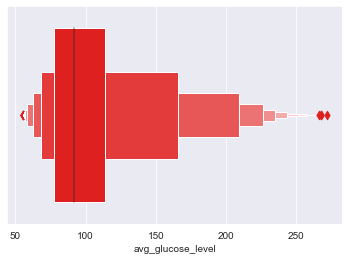

In [6]:
sns.boxenplot(x='avg_glucose_level',hue='gender',data=df, color='Red');

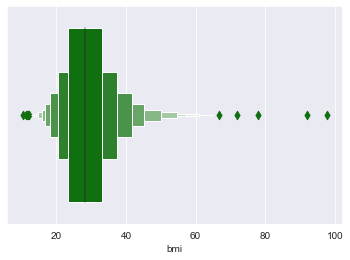

In [7]:
sns.boxenplot(x='bmi',data=df, color = 'Green');

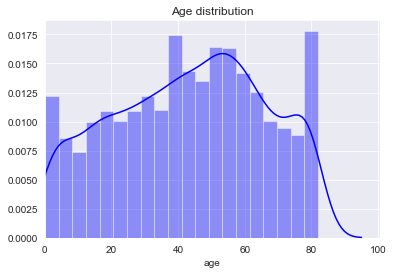

In [8]:
sns.distplot(df['age'],color = 'Blue')
plt.xlim(0)
plt.title('Age distribution');

## Exploring data of people who suffered stroke.

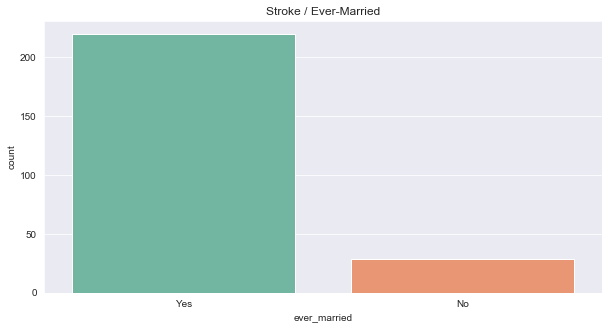

In [9]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='ever_married', palette="Set2")
plt.title("Stroke / Ever-Married");

*Looks like  the number of married people tend to have stroke significantly higher than single people. Interesting!!*

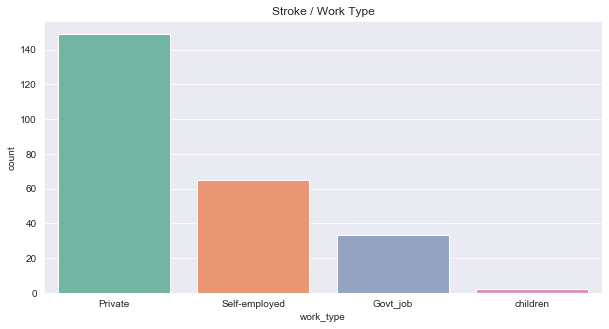

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='work_type', palette="Set2")
plt.title("Stroke / Work Type");

People in private sector has higher risk of having a stroke

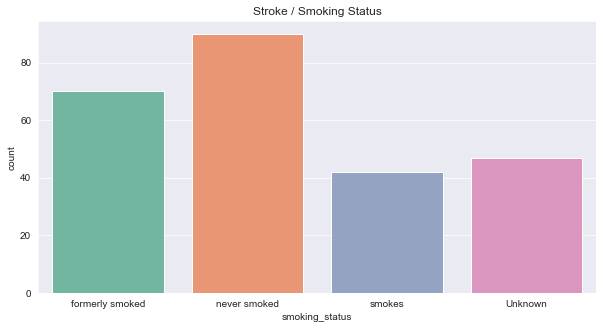

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='smoking_status', palette="Set2")
plt.title("Stroke / Smoking Status");

In total, former smokers and currently smokers has the highest risk 

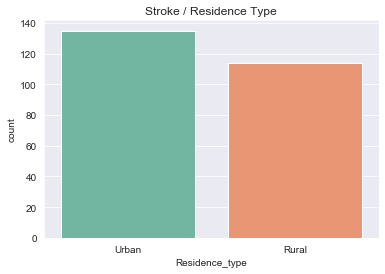

In [12]:
sns.countplot(data=stroke,x='Residence_type', palette="Set2")
plt.title("Stroke / Residence Type");

Now we have a close distribution of rural and urban type of residence. Looks like it does not effect much.

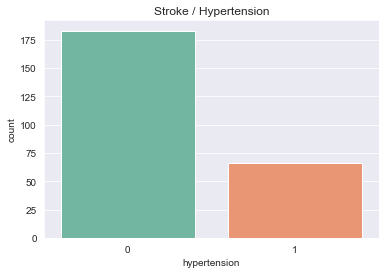

In [13]:
sns.countplot(data=stroke,x='hypertension', palette="Set2")
plt.title("Stroke / Hypertension");

People without hypertension has more risk to have a stroke

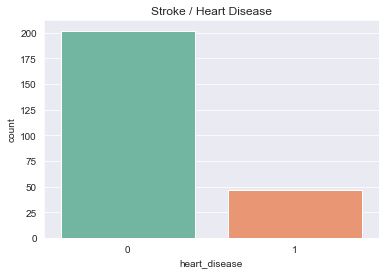

In [14]:
sns.countplot(data=stroke,x='heart_disease', palette="Set2")
plt.title("Stroke / Heart Disease");

People without any previous heart disease has more risk to have a stroke

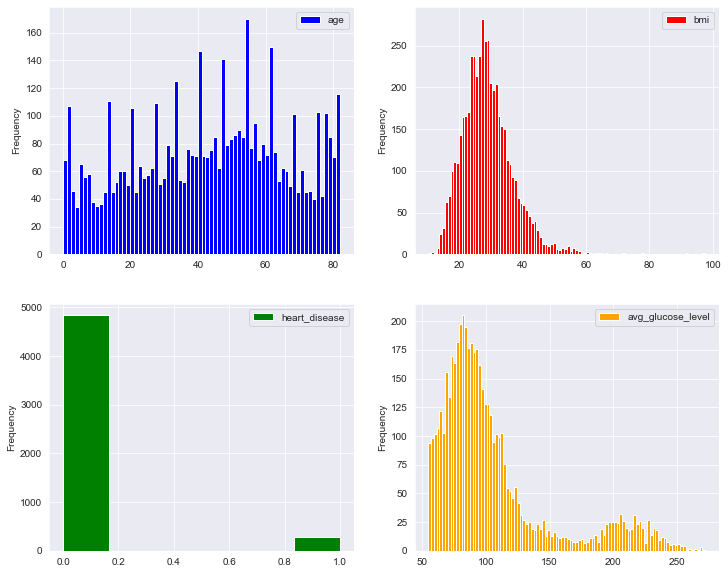

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

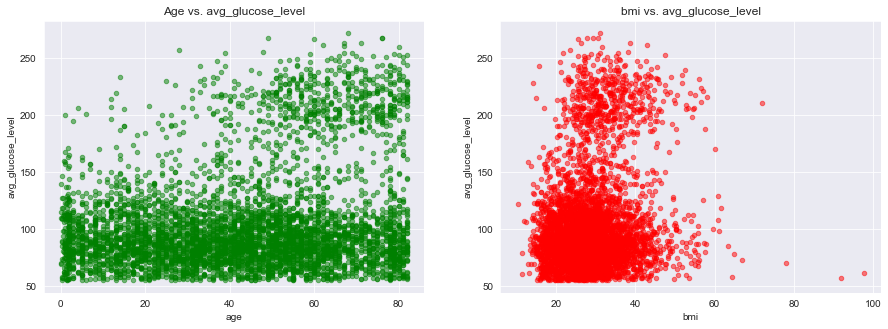

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

As age increases average glucose level also increases.

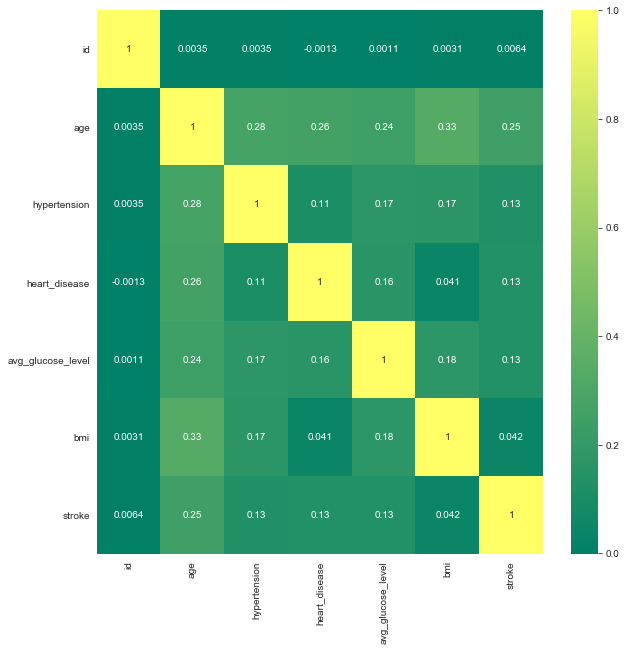

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='summer');